In [1]:
### 한글 글꼴 설치 ### ( 주피터랩 )

import matplotlib.pyplot as plt
import platform

# 운영체제 확인
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
else:
    plt.rcParams['font.family'] = 'sans-serif'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 로드

import pandas as pd
import numpy as np

file_path = "E Commerce Dataset2.xlsx"
df = pd.read_excel(file_path)
print("✅ 데이터 불러오기 완료")
df.head()


✅ 데이터 불러오기 완료


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# 데이터 분석
```
컬럼 한글명변경
다양하게 시작화
    [1] 범주형 변수 vs 이탈여부: 교차 분석 (막대그래프)
    [2] 수치형 변수 vs 이탈여부: 분포 시각화 (박스플롯 & KDE)
다양하게 수치화
```

In [3]:
# 1. 한글 컬럼명으로 바꾸기 위한 딕셔너리 생성
column_rename_dict = {
    'CustomerID': '고객ID',
    'Churn': '이탈여부',
    'Tenure': '가입개월',
    'PreferredLoginDevice': '선호로그인기기',
    'CityTier': '도시등급',
    'WarehouseToHome': '창고_거리',
    'PreferredPaymentMode': '결제방식',
    'Gender': '성별',
    'HourSpendOnApp': '앱_사용시간',
    'NumberOfDeviceRegistered': '등록기기수',
    'PreferedOrderCat': '선호주문카테고리',
    'SatisfactionScore': '만족도점수',
    'MaritalStatus': '결혼상태',
    'NumberOfAddress': '주소개수',
    'Complain': '불만여부',
    'OrderAmountHikeFromlastYear': '작년대비주문금액증가율',
    'CouponUsed': '쿠폰사용수',
    'OrderCount': '총주문수',
    'DaySinceLastOrder': '최근주문일',
    'CashbackAmount': '캐시백금액'
}

# 2. 위 딕셔너리를 사용해서 df의 컬럼명을 한글로 바꾸기
df.rename(columns=column_rename_dict, inplace=True)

# 3. 결과 확인
print("✅ 컬럼명 한글로 변경 완료")
print(df.columns.tolist())


✅ 컬럼명 한글로 변경 완료
['고객ID', '이탈여부', '가입개월', '선호로그인기기', '도시등급', '창고_거리', '결제방식', '성별', '앱_사용시간', '등록기기수', '선호주문카테고리', '만족도점수', '결혼상태', '주소개수', '불만여부', '작년대비주문금액증가율', '쿠폰사용수', '총주문수', '최근주문일', '캐시백금액']


In [4]:
# 고객ID 제거
df = df.drop('고객ID', axis=1)

In [5]:
# 코드 1: 기본 데이터 상태 요약 + 결측치 점검

import pandas as pd

# 1. 데이터 크기
print("📌 [1] 데이터 크기 (행, 열):", df.shape)

# 2. 컬럼별 데이터 타입
print("\n📌 [2] 컬럼별 데이터 타입:")
print(df.dtypes)

# 3. 결측치 개수
print("\n📌 [3] 컬럼별 결측치 개수:")
print(df.isnull().sum())

# 4. 고유값 수 (범주형 탐색용)
print("\n📌 [4] 컬럼별 고유값 수:")
print(df.nunique())



📌 [1] 데이터 크기 (행, 열): (5630, 19)

📌 [2] 컬럼별 데이터 타입:
이탈여부             int64
가입개월           float64
선호로그인기기         object
도시등급             int64
창고_거리          float64
결제방식            object
성별              object
앱_사용시간         float64
등록기기수            int64
선호주문카테고리        object
만족도점수            int64
결혼상태            object
주소개수             int64
불만여부             int64
작년대비주문금액증가율    float64
쿠폰사용수          float64
총주문수           float64
최근주문일          float64
캐시백금액          float64
dtype: object

📌 [3] 컬럼별 결측치 개수:
이탈여부             0
가입개월           264
선호로그인기기          0
도시등급             0
창고_거리          251
결제방식             0
성별               0
앱_사용시간         255
등록기기수            0
선호주문카테고리         0
만족도점수            0
결혼상태             0
주소개수             0
불만여부             0
작년대비주문금액증가율    265
쿠폰사용수          256
총주문수           258
최근주문일          307
캐시백금액            0
dtype: int64

📌 [4] 컬럼별 고유값 수:
이탈여부              2
가입개월             36
선호로그인기기           3
도시등급              3
창고_거리  

# 결과

```
항목 | 요약
🔢 전체 크기 | 5630개 행, 20개 컬럼
🔎 결측치 존재 컬럼 | 가입개월, 창고_거리, 앱_사용시간, 작년대비주문금액증가율, 쿠폰사용수, 총주문수, 최근주문일
📉 수치형 컬럼 수 | 약 13개 (float64, int64)
🧾 범주형 컬럼 수 | 약 7개 (object) → 인코딩 필요 예정
⚠️ 고유값 매우 많은 컬럼 | 고객ID, 캐시백금액 (정규화 또는 제거 고려)
```


In [6]:
# 다음 코드 2: 수치형 통계 요약 + Boxplot 시각화

# 수치형 변수만 추출
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 통계 요약
print("📌 수치형 변수 요약 통계:")
print(df[num_cols].describe())


📌 수치형 변수 요약 통계:
              이탈여부         가입개월         도시등급        창고_거리       앱_사용시간  \
count  5630.000000  5366.000000  5630.000000  5379.000000  5375.000000   
mean      0.168384    10.189899     1.654707    15.639896     2.931535   
std       0.374240     8.557241     0.915389     8.531475     0.721926   
min       0.000000     0.000000     1.000000     5.000000     0.000000   
25%       0.000000     2.000000     1.000000     9.000000     2.000000   
50%       0.000000     9.000000     1.000000    14.000000     3.000000   
75%       0.000000    16.000000     3.000000    20.000000     3.000000   
max       1.000000    61.000000     3.000000   127.000000     5.000000   

             등록기기수        만족도점수         주소개수         불만여부  작년대비주문금액증가율  \
count  5630.000000  5630.000000  5630.000000  5630.000000  5365.000000   
mean      3.688988     3.066785     4.214032     0.284902    15.707922   
std       1.023999     1.380194     2.583586     0.451408     3.675485   
min       1.000000   

C:\Users\gobok\anaconda3\envs\paynt\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


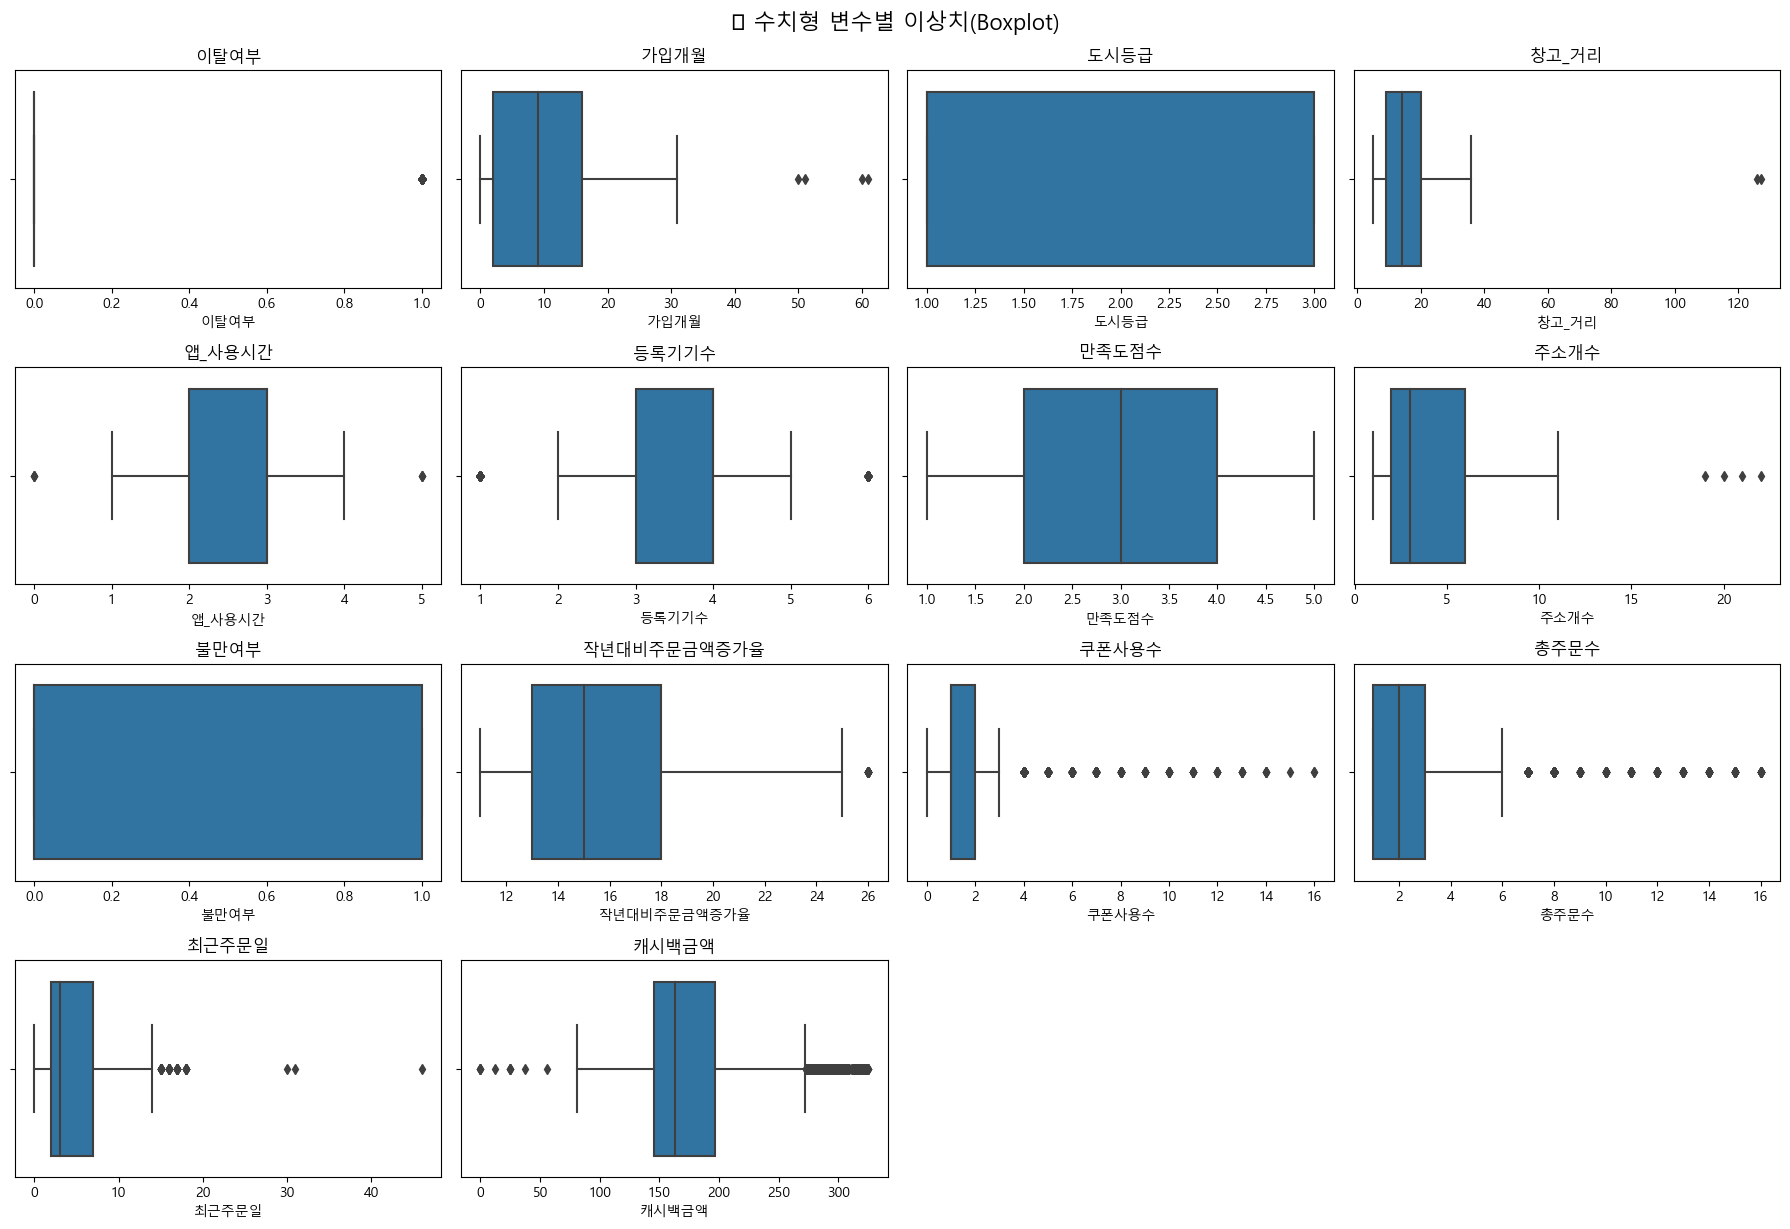

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 고객ID가 포함되어 있다면 제거
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('고객ID', errors='ignore')  # errors='ignore'는 없으면 무시

# 박스플롯 (수치형 변수별 반복)
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
plt.suptitle("📦 수치형 변수별 이상치(Boxplot)", fontsize=16, y=1.02)
plt.show()


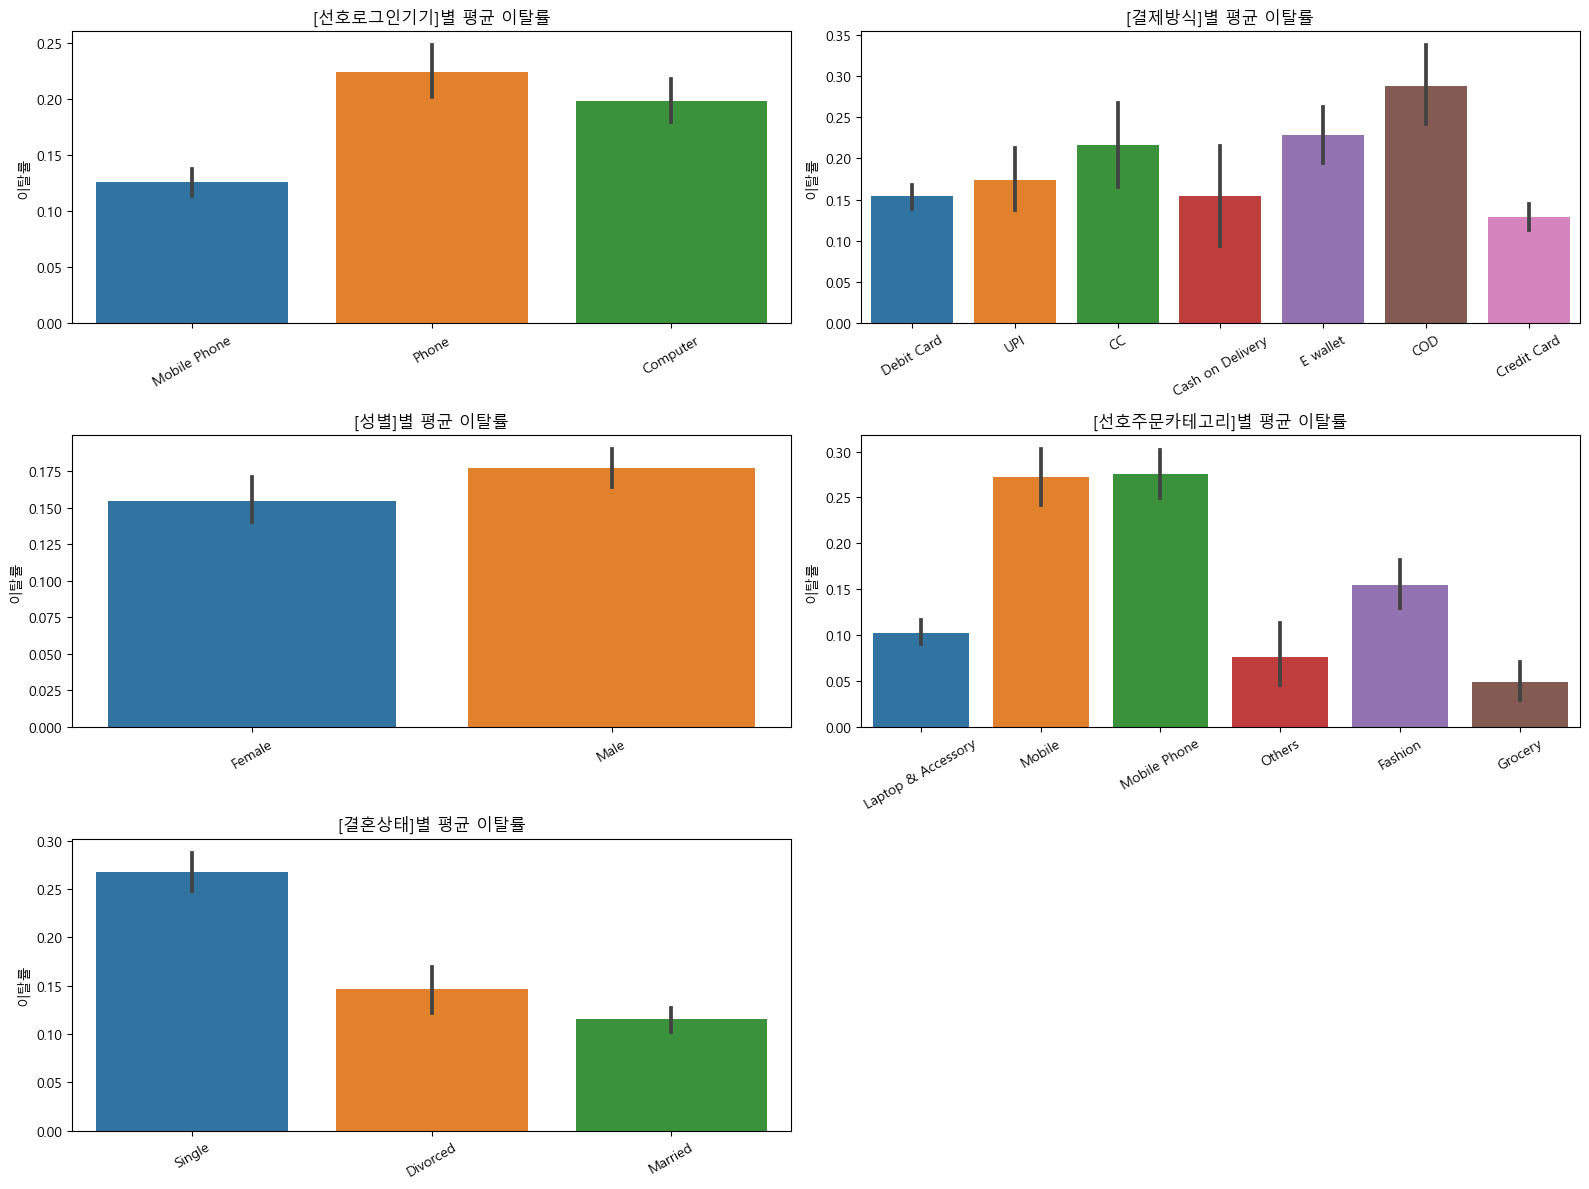

In [8]:
# [1] 범주형 변수 vs 이탈여부: 교차 분석 & 막대그래프

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 분석에 사용할 범주형 변수 목록
cat_cols = ['선호로그인기기', '결제방식', '성별', '선호주문카테고리', '결혼상태']

# 📌 시각화
plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=col, y='이탈여부', data=df, estimator=lambda x: sum(x)/len(x))  # 평균 = 이탈률
    plt.xticks(rotation=30)
    plt.title(f'[{col}]별 평균 이탈률', fontsize=12)
    plt.ylabel("이탈률")
    plt.xlabel("")
plt.tight_layout()
plt.show()


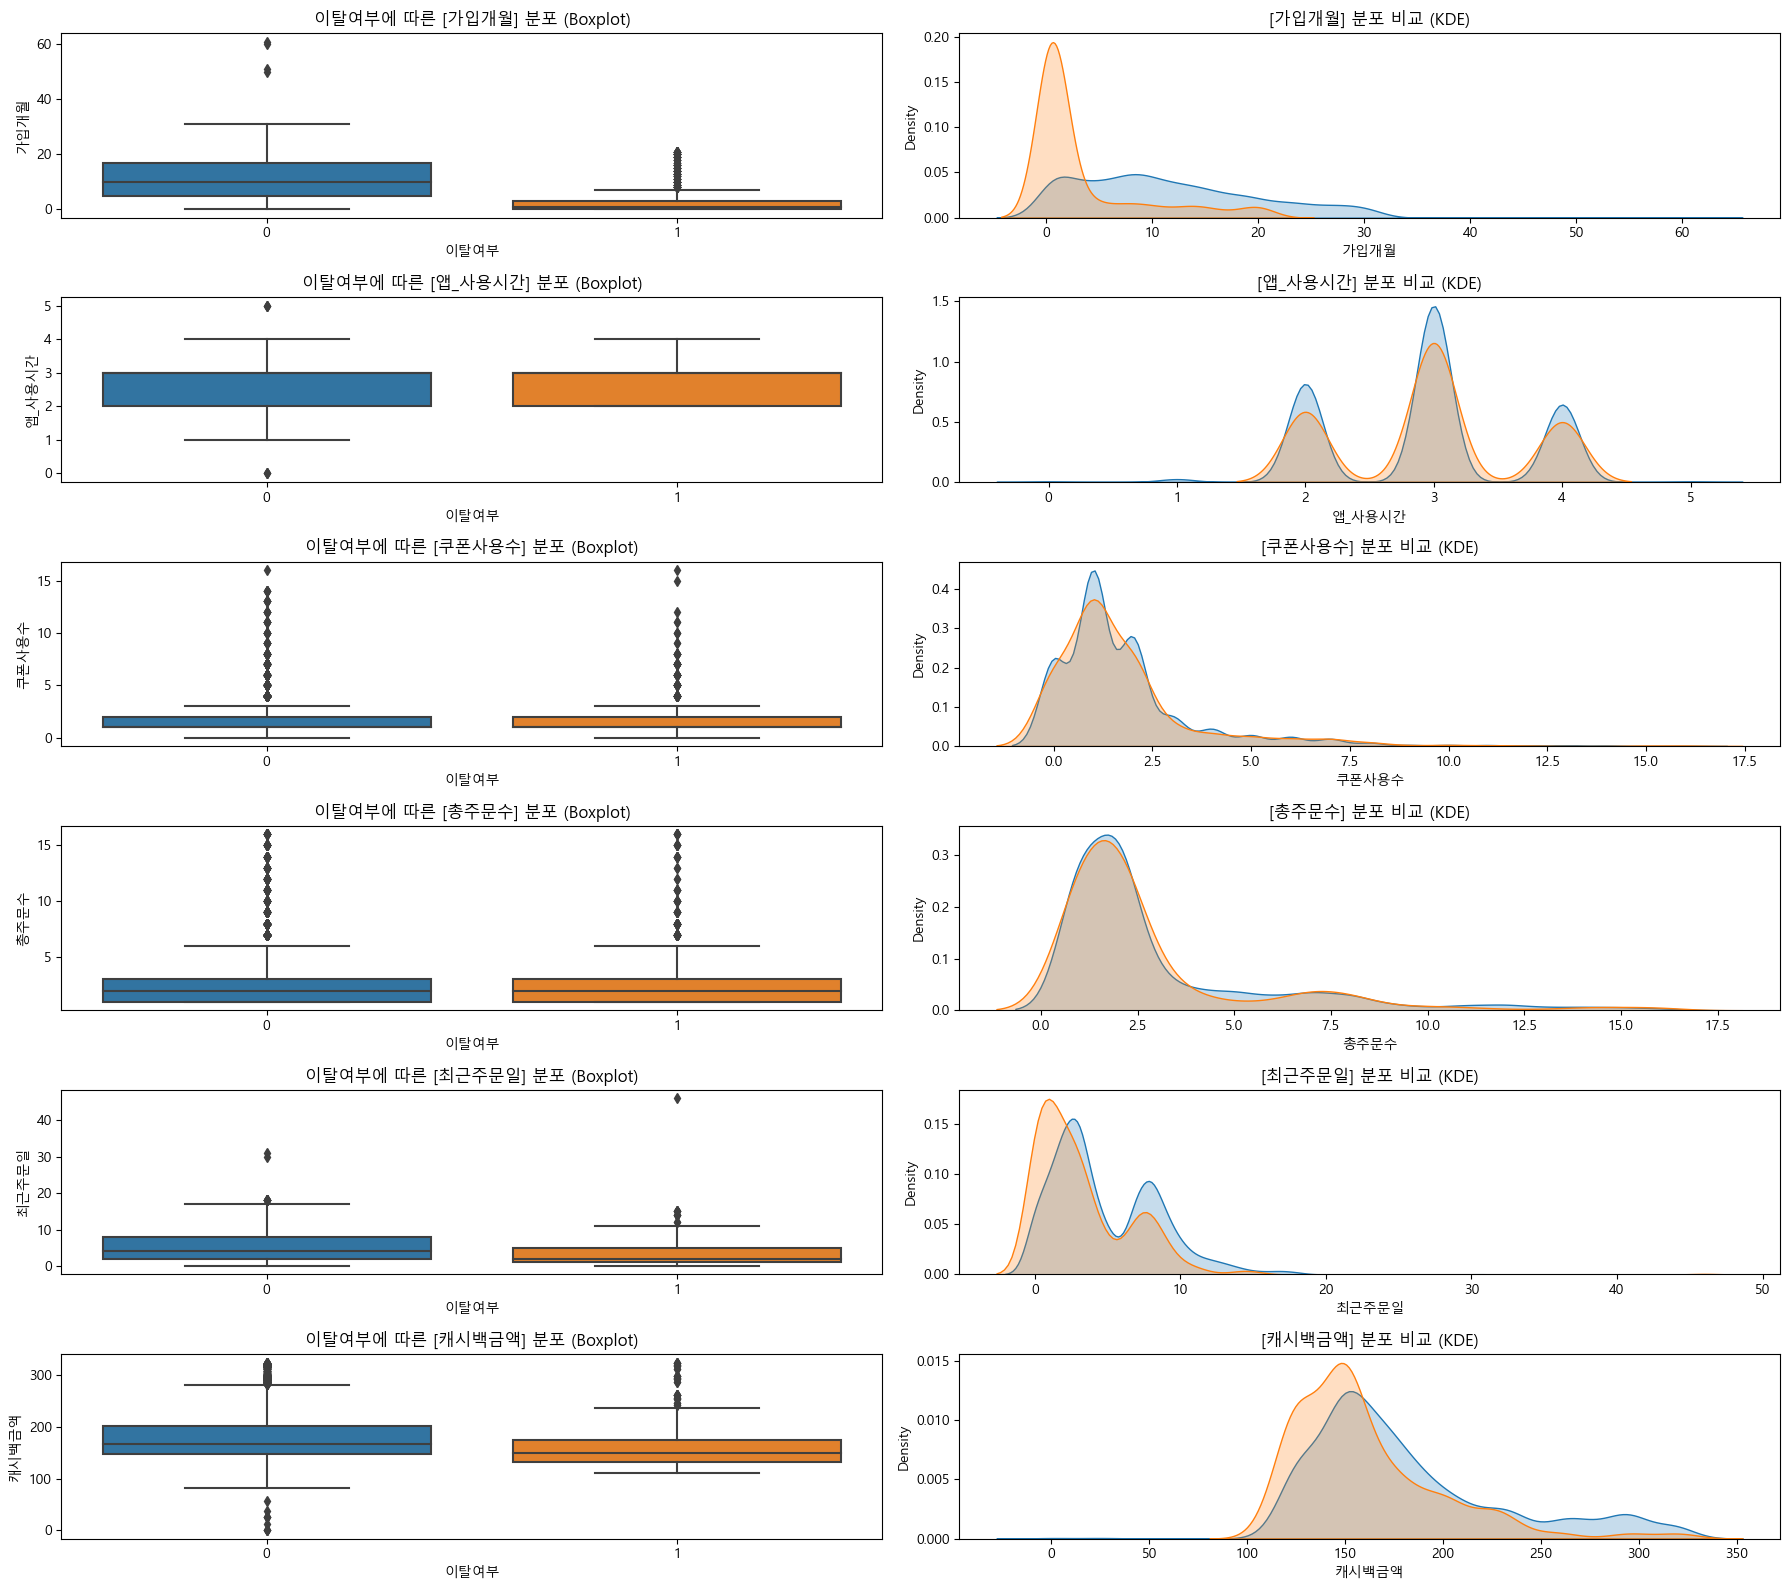

In [9]:
# [2] 수치형 변수 vs 이탈여부: 분포 분석 (박스플롯 + KDE)

# 📌 수치형 변수 중 주요 변수 선택 (시각화 용이한 것)
num_cols = ['가입개월', '앱_사용시간', '쿠폰사용수', '총주문수', '최근주문일', '캐시백금액']

plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols):
    # Boxplot
    plt.subplot(6, 2, 2*i+1)
    sns.boxplot(x='이탈여부', y=col, data=df)
    plt.title(f'이탈여부에 따른 [{col}] 분포 (Boxplot)')
    
    # KDE Plot
    plt.subplot(6, 2, 2*i+2)
    for label in sorted(df['이탈여부'].unique()):
        sns.kdeplot(df[df['이탈여부'] == label][col], label=f'이탈여부={label}', fill=True)
    plt.title(f'[{col}] 분포 비교 (KDE)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


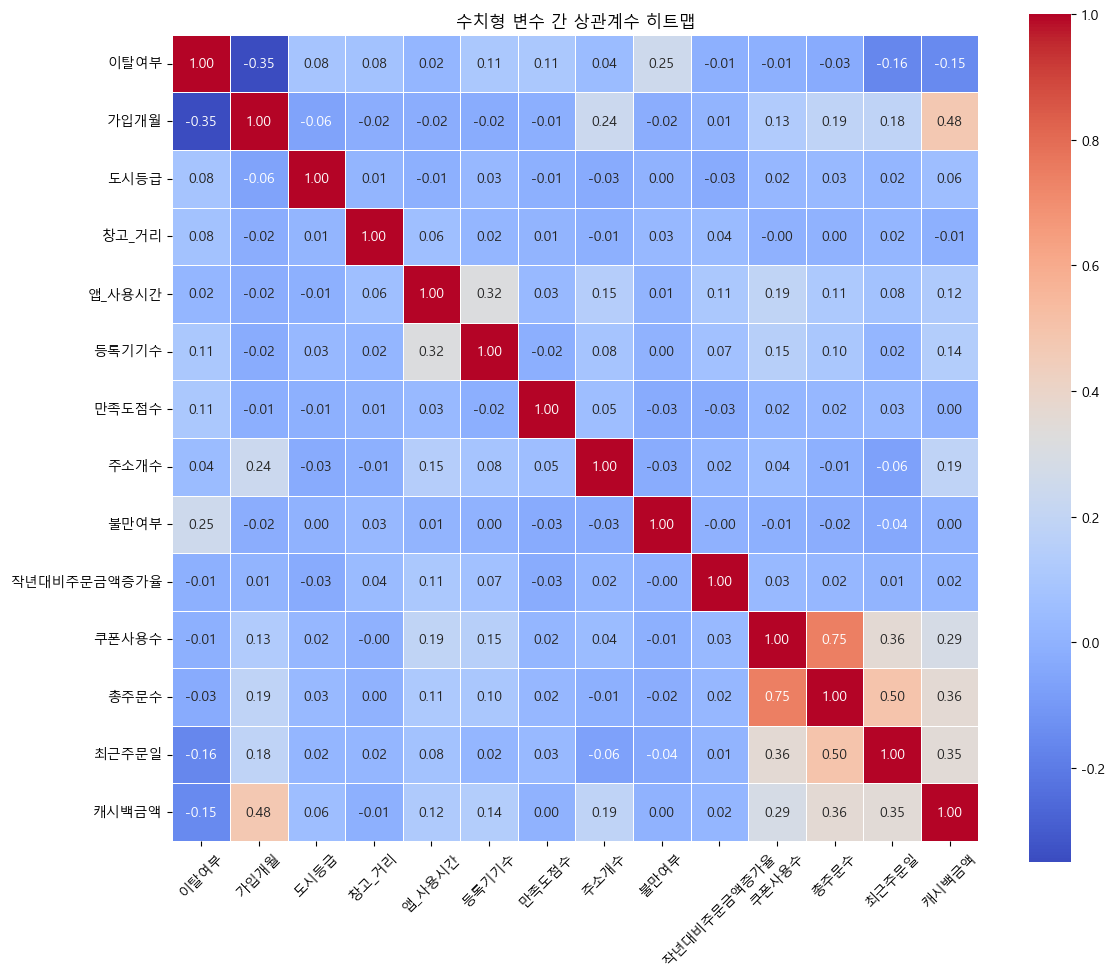

📌 이탈여부와 상관 높은 변수 정렬:
 불만여부           0.250188
등록기기수          0.107939
만족도점수          0.105481
도시등급           0.084703
창고_거리          0.076630
주소개수           0.043931
앱_사용시간         0.018675
쿠폰사용수         -0.008264
작년대비주문금액증가율   -0.010058
총주문수          -0.028697
캐시백금액         -0.154118
최근주문일         -0.160757
가입개월          -0.349408
Name: 이탈여부, dtype: float64


In [10]:
# ✅ 상관계수 계산 및 히트맵 시각화 코드

import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 추출
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 상관계수 계산
corr_matrix = df[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("수치형 변수 간 상관계수 히트맵")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 이탈여부(Churn) 기준 상위 상관관계 정렬 출력
churn_corr = corr_matrix['이탈여부'].drop('이탈여부').sort_values(ascending=False)
print("📌 이탈여부와 상관 높은 변수 정렬:\n", churn_corr)


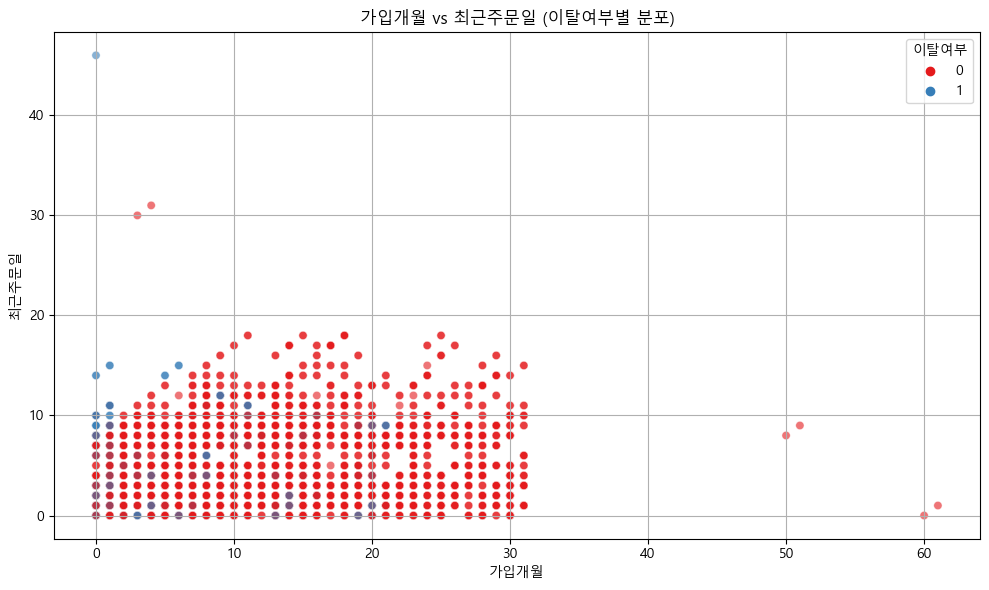

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='가입개월', y='최근주문일', hue='이탈여부', alpha=0.6, palette='Set1')
plt.title('가입개월 vs 최근주문일 (이탈여부별 분포)')
plt.xlabel('가입개월')
plt.ylabel('최근주문일')
plt.grid(True)
plt.tight_layout()
plt.show()


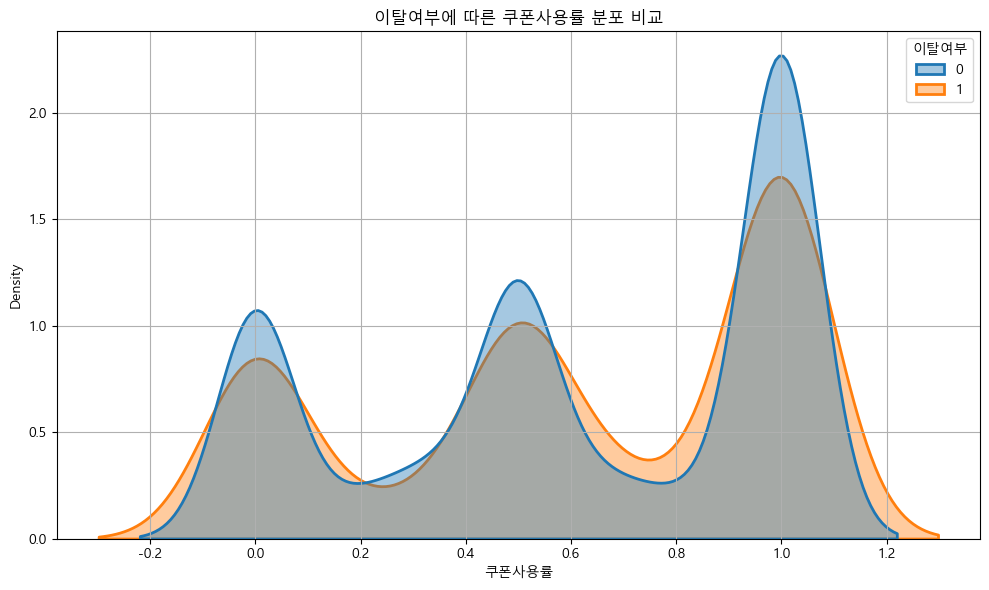

In [12]:
# 코드 2: 쿠폰사용률 파생변수 생성 및 분포 시각화

# 결측치 제거한 후 쿠폰사용률 파생변수 생성
import numpy as np  # 이 줄을 꼭 추가하세요

# 결측치 제거한 후 쿠폰사용률 파생변수 생성
df['쿠폰사용률'] = df['쿠폰사용수'] / df['총주문수']
df['쿠폰사용률'] = df['쿠폰사용률'].replace([np.inf, -np.inf], np.nan)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='쿠폰사용률', hue='이탈여부', common_norm=False, fill=True, alpha=0.4, linewidth=2)
plt.title('이탈여부에 따른 쿠폰사용률 분포 비교')
plt.xlabel('쿠폰사용률')
plt.grid(True)
plt.tight_layout()
plt.show()


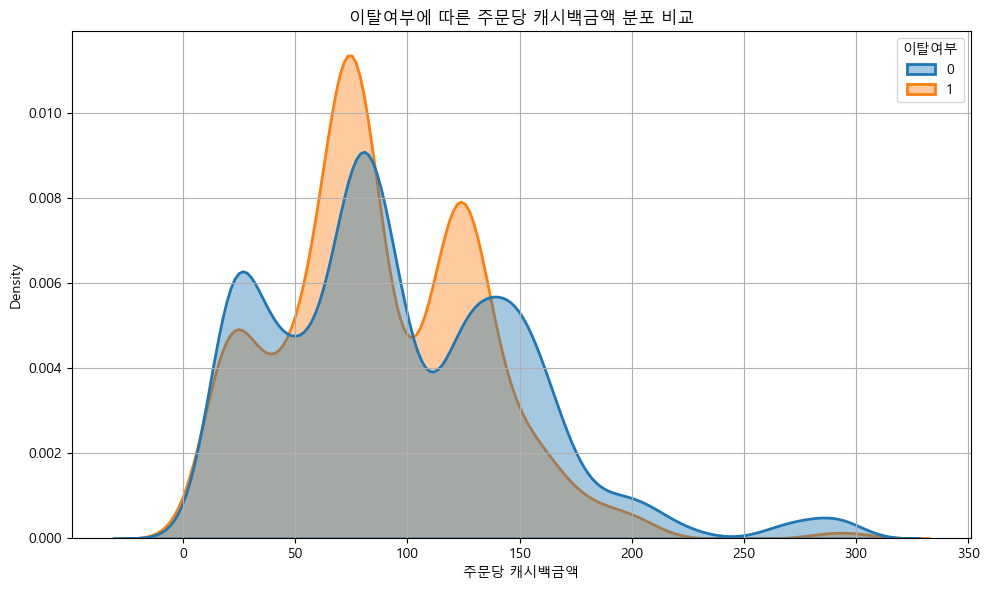

In [13]:
 # [3단계] 주문당 캐시백금액 파생변수 생성 및 시각화

# 주문당 캐시백금액 파생 변수 생성
df['주문당캐시백'] = df['캐시백금액'] / df['총주문수']
df['주문당캐시백'] = df['주문당캐시백'].replace([np.inf, -np.inf], np.nan)

# 시각화
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='주문당캐시백', hue='이탈여부', common_norm=False, fill=True, alpha=0.4, linewidth=2)
plt.title('이탈여부에 따른 주문당 캐시백금액 분포 비교')
plt.xlabel('주문당 캐시백금액')
plt.grid(True)
plt.tight_layout()
plt.show()


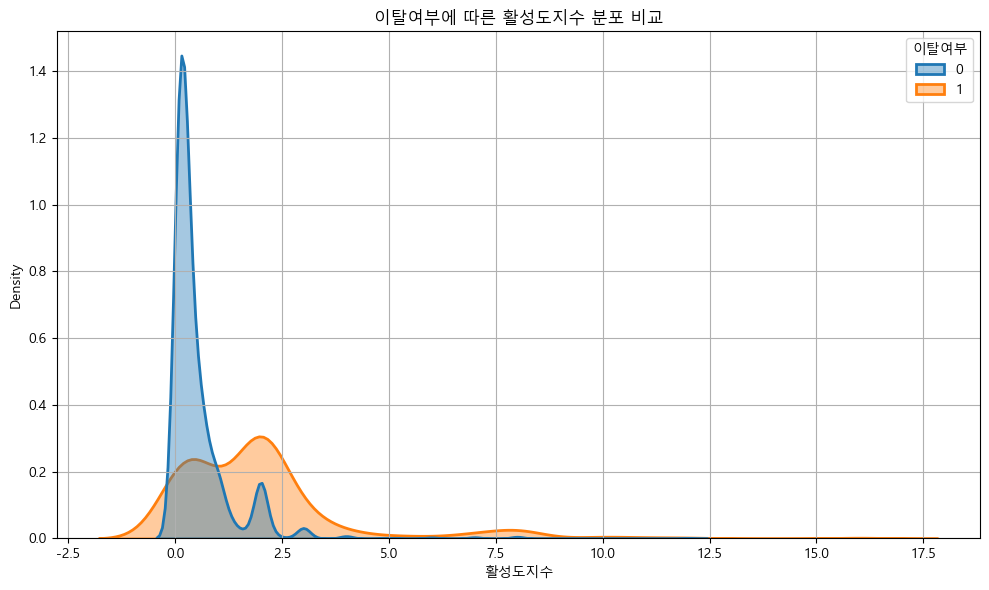

In [14]:
 # [4단계] 고객 활성도 지수 (활성도지수 = 가입개월 대비 주문수) 생성 및 시각화

# 고객 활성도 파생 변수 생성
df['활성도지수'] = df['총주문수'] / df['가입개월']
df['활성도지수'] = df['활성도지수'].replace([np.inf, -np.inf], np.nan)

# 시각화
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='활성도지수', hue='이탈여부', common_norm=False, fill=True, alpha=0.4, linewidth=2)
plt.title('이탈여부에 따른 활성도지수 분포 비교')
plt.xlabel('활성도지수')
plt.grid(True)
plt.tight_layout()
plt.show()


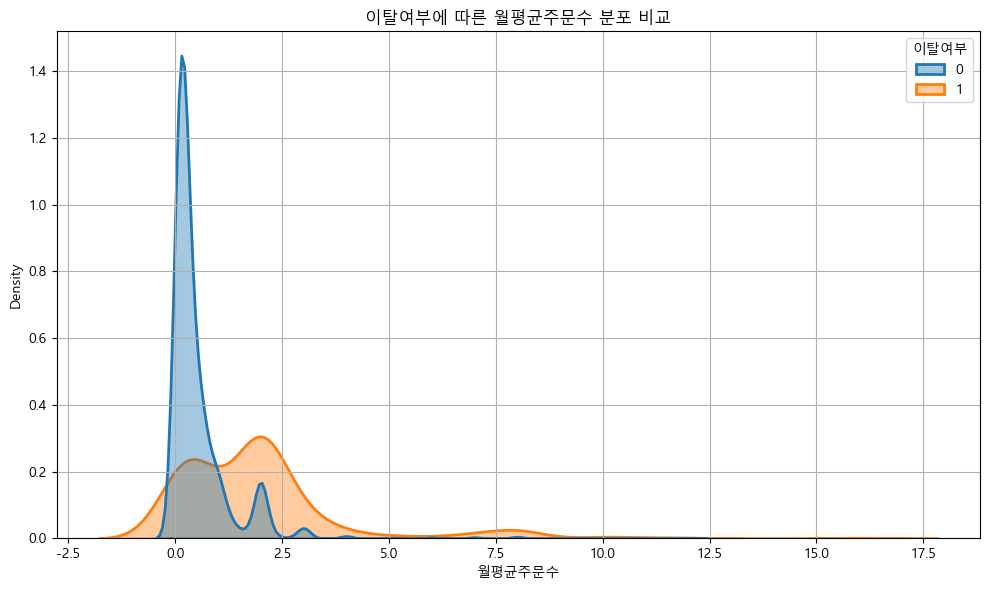

In [15]:
 # [5단계] 월평균주문수 = 총주문수 / 가입개월 파생변수 생성 및 시각화

# 월평균 주문수 파생 변수 생성
df['월평균주문수'] = df['총주문수'] / df['가입개월']
df['월평균주문수'] = df['월평균주문수'].replace([np.inf, -np.inf], np.nan)

# 시각화
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='월평균주문수', hue='이탈여부', common_norm=False, fill=True, alpha=0.4, linewidth=2)
plt.title('이탈여부에 따른 월평균주문수 분포 비교')
plt.xlabel('월평균주문수')
plt.grid(True)
plt.tight_layout()
plt.show()


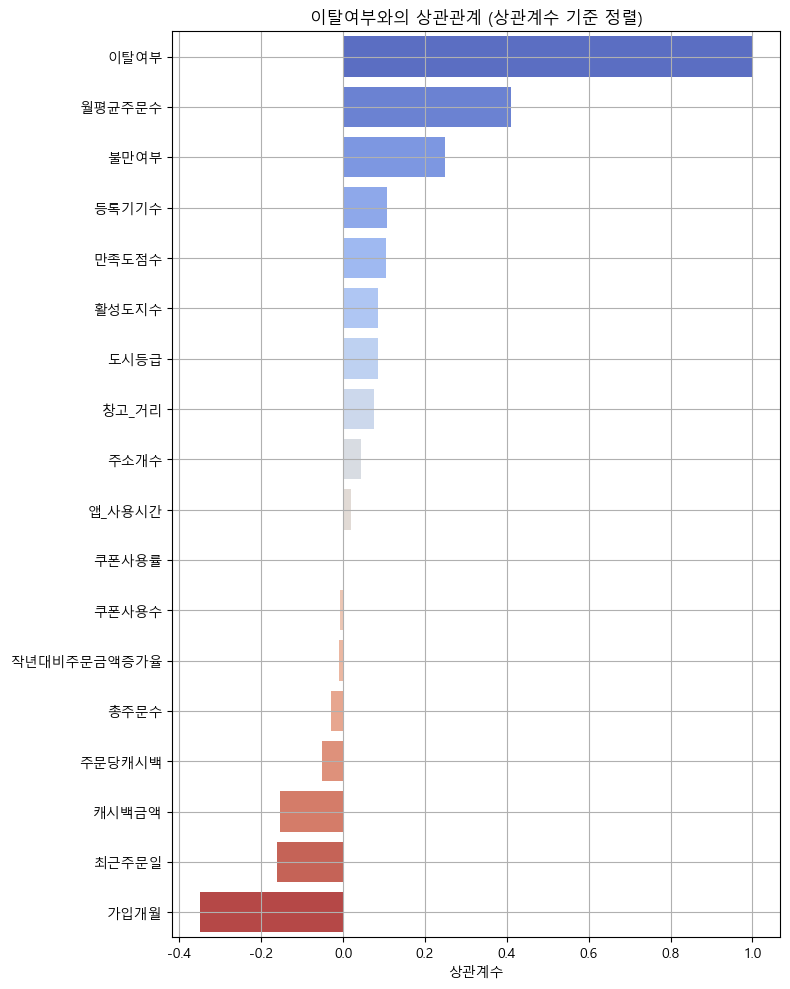

In [16]:
# [6단계] 전체 파생 변수 상관관계 정리 및 시각화

# 파생 변수 다시 정리
df['쿠폰사용률'] = df['쿠폰사용수'] / df['총주문수']
df['쿠폰사용률'] = df['쿠폰사용률'].replace([np.inf, -np.inf], np.nan)

df['주문당캐시백'] = df['캐시백금액'] / df['총주문수']
df['주문당캐시백'] = df['주문당캐시백'].replace([np.inf, -np.inf], np.nan)

df['활성도지수'] = df['총주문수'] / df['최근주문일']
df['활성도지수'] = df['활성도지수'].replace([np.inf, -np.inf], np.nan)

df['월평균주문수'] = df['총주문수'] / df['가입개월']
df['월평균주문수'] = df['월평균주문수'].replace([np.inf, -np.inf], np.nan)

# 상관계수 계산 (이탈여부와만)
correlation = df.corr(numeric_only=True)['이탈여부'].sort_values(ascending=False)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title('이탈여부와의 상관관계 (상관계수 기준 정렬)')
plt.xlabel('상관계수')
plt.grid(True)
plt.tight_layout()
plt.show()


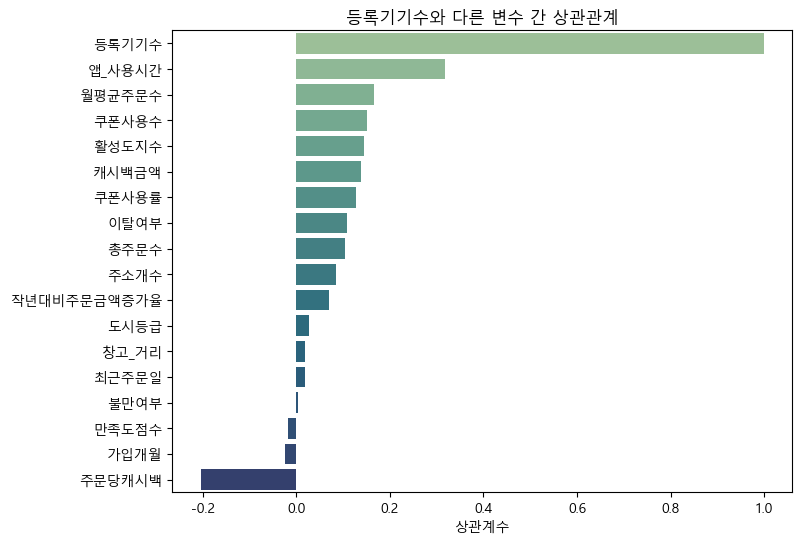

In [17]:
# 등록기기수와 다른 수치형 변수 간 상관계수 계산
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numeric_cols].corr()['등록기기수'].sort_values(ascending=False)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="crest")
plt.title("등록기기수와 다른 변수 간 상관관계")
plt.xlabel("상관계수")
plt.show()


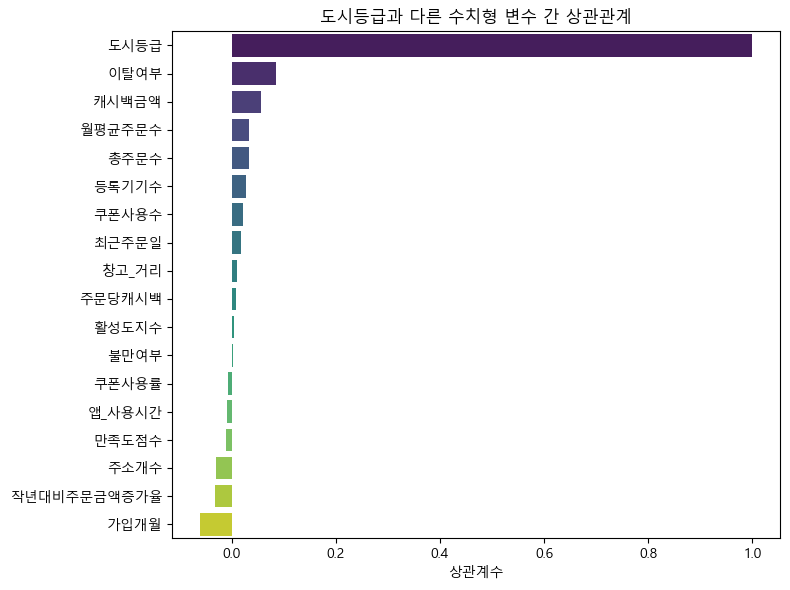

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# '도시등급'과의 상관계수만 추출
city_corr = df[numeric_cols].corr()['도시등급'].sort_values(ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=city_corr.values, y=city_corr.index, palette='viridis')
plt.title('도시등급과 다른 수치형 변수 간 상관관계')
plt.xlabel('상관계수')
plt.tight_layout()
plt.show()


# 이상치 결측치 제거


In [19]:
# 결측치 처리: 수치형 컬럼은 중앙값으로 대체
df = df.copy()  # 원본 보존
df.fillna(df.median(numeric_only=True), inplace=True)


In [20]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # 이상치 범위 밖의 행 제거
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# 이상치 제거 대상 수치형 컬럼 정의
outlier_cols = [
    '가입개월', '총주문수', '쿠폰사용수', '최근주문일', '캐시백금액', '주소개수',
    '등록기기수', '창고_거리', '앱_사용시간', '주문당캐시백', '월평균주문수', '활성도지수'
]

# 이상치 제거 실행
df = remove_outliers_iqr(df, outlier_cols)


In [21]:
print("✅ 처리 완료 후 데이터 크기:", df.shape)
print("✅ 결측치 남아있는 컬럼:\n", df.isnull().sum()[df.isnull().sum() > 0])


✅ 처리 완료 후 데이터 크기: (2874, 23)
✅ 결측치 남아있는 컬럼:
 Series([], dtype: int64)


# 피쳐 엔지니어링
```
 1. 로그 변환 - 왜곡된 수치형 변수 스케일 조정
 2. 파생 변수 생성 - 고객 행동 특성을 반영한 새로운 변수 추가
 3. 범주형 변수 인코딩 - 원-핫 인코딩으로 모델 학습에 적합한 형태로 변환
 4. 스케일링 (선택) - 수치형 정규화 → 이후에 적용 가능

```

In [22]:
# [1단계] 로그 변환: 비대칭 분포 변수

import numpy as np

# 로그 변환 적용할 컬럼
log_cols = ['총주문수', '쿠폰사용수', '최근주문일']

# 1을 더한 후 로그 변환 (0값 방지)
for col in log_cols:
    df[col + '_로그'] = np.log1p(df[col])


In [23]:
# [2단계] 파생 변수 생성

# 쿠폰 사용률
df['쿠폰사용률'] = df['쿠폰사용수'] / df['총주문수']

# 주문당 캐시백
df['주문당캐시백'] = df['캐시백금액'] / df['총주문수']

# 활성도 지수: 총 주문 / 최근 주문일
df['활성도지수'] = df['총주문수'] / (df['최근주문일'] + 1)

# 월평균 주문수
df['월평균주문수'] = df['총주문수'] / (df['가입개월'] + 1)

# 결측값 또는 무한값 처리
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


In [24]:
# [3단계] 범주형 변수 인코딩

# 범주형 변수만 인코딩
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [25]:
# 확인

print("✅ 전체 컬럼 수:", df.shape[1])
print("✅ 생성된 컬럼 예시:\n", df.columns[-10:])



✅ 전체 컬럼 수: 36
✅ 생성된 컬럼 예시:
 Index(['결제방식_Debit Card', '결제방식_E wallet', '결제방식_UPI', '성별_Male',
       '선호주문카테고리_Grocery', '선호주문카테고리_Laptop & Accessory', '선호주문카테고리_Mobile',
       '선호주문카테고리_Mobile Phone', '결혼상태_Married', '결혼상태_Single'],
      dtype='object')


# 모델 훈련 전단계
```
 - X, y 분리
 - Train/Test 분할
 - SMOTE 적용

```

In [26]:
# 타겟과 피처 분리
X = df.drop('이탈여부', axis=1)
y = df['이탈여부']


In [27]:
# [4] Train/Test 분할

from sklearn.model_selection import train_test_split

# stratify는 클래스 비율 유지
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [28]:
# [5] SMOTE 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 클래스 분포 확인
print("✅ SMOTE 전:", y_train.value_counts().to_dict())
print("✅ SMOTE 후:", y_train_smote.value_counts().to_dict())


✅ SMOTE 전: {0: 1969, 1: 330}
✅ SMOTE 후: {0: 1969, 1: 1969}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ✅ 모델 정의 (기본 설정)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True, random_state=42),
    "GaussianNB": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

# ✅ 평가 함수
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    # 확률 예측이 가능한 모델만 AUC 계산
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    # 메트릭 계산
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    delta = abs(train_acc - test_acc)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # 출력
    print(f"\n================== {name} ==================")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"Precision:      {precision:.4f}")
    print(f"Recall:         {recall:.4f}")
    print(f"F1 Score:       {f1:.4f}")
    print(f"AUC:            {auc:.4f}" if auc is not None else "AUC: N/A")
    print(f"⚠️ Train-Test 차이: {delta:.4f} → {'과적합 가능' if delta > 0.05 else '양호'}")
    print(f"CV 평균 F1: {cv_scores.mean():.4f}, 표준편차: {cv_scores.std():.4f}")
    print("✅ 교차검증 결과 안정적" if cv_scores.std() < 0.01 else "⚠️ 교차검증 변동성 존재")
    print("\n[분류 리포트]")
    print(classification_report(y_test, y_pred, zero_division=0))

# ✅ 전체 모델 실행
for name, model in models.items():
    evaluate_model(name, model, X_train_smote, y_train_smote, X_test_scaled, y_test)


C:\Users\gobok\anaconda3\envs\paynt\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\gobok\anaconda3\envs\paynt\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gobok\anaconda3\envs\paynt\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\gobok\anaconda3\envs\paynt\lib\site-packages\sklearn\base.py:439: UserWa